# Letter Frequencies in Spelling Games

I've been working on another project that, among other things, involves counting letters in text documents. In the course of working on that the thought came to me to investigate the relative frequencies of letters in some popular board games of the type where players compete to spell words. I hope the results will prove a least a little enlightening to someone interesting designing words games, or even. just playing them.

## Setting Up

We'll begin by importing `pandas` to read in and manipulate the raw data, `matplotlib` and `seaborn` to handle the plotting, `Counter` from the collections module to tally up letters in text documents, and a list of `punctuation` from the `string` module to make sure we only tally up letters. The last three lines set stylistics options to control the colors and font of the plot and how the dataframes are displayed.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from string import punctuation

sns.set(font='monospace', style='white')
pd.options.display.max_columns = 0
pd.options.display.float_format = '{:.3f}'.format

## The Games

Here are the board games we'll take a look at, followed by a link to each game's page on BoardGameGeek which is also where I sourced the data.

* **Scrabble** ([BoardGameGeek]()) is the word game most people are likely to be familiar with and I think needs no extra explanation here. All of the other games are variations on this original; some minor, others significant.
* **Scrabble Junior** ([BoardGameGeek]()) is a version of Scrabble designed for children and serves as part game and part teaching tool. The rules are simplified and, as you'll see later, the collection of letters differs as well.
* **Super Scrabble** ([BoardGameGeek]()) 
* Bananagrams ([BoardGameGeek]())
* Upwords ([BoardGameGeek]())

In [2]:
scrabble = pd.read_csv('data/scrabble.csv')
scrabble_jr = pd.read_csv('data/scrabble_jr.csv')
super_scrabble = pd.read_csv('data/super_scrabble.csv')
bananagrams = pd.read_csv('data/bananagrams.csv')
upwords = pd.read_csv('data/upwords_10.csv')

games = [scrabble, scrabble_jr, super_scrabble, upwords, bananagrams]
names = ['Scrabble', 'Scrabble Junior', 'Super Scrabble', 'Upwords', 'Bananagrams']

Let's a take a look at just one game, laid on its side to fit better in the notebook. *Scrabble* pieces include blank tiles and point counts, but other games may not have one or the other.

In [3]:
scrabble.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
letter,e,a,i,o,n,r,t,l,s,u,d,g,b,c,m,p,f,h,v,w,y,k,j,x,q,z,BLANK
count,12,9,9,8,6,6,6,4,4,4,4,3,2,2,2,2,2,2,2,2,2,1,1,1,1,1,2
value,1,1,1,1,1,1,1,1,1,1,2,2,3,3,3,3,4,4,4,4,4,5,8,8,10,10,0


Further poking around will involve considering what proportion of a game's pieces each letter is. Also, we might want to include blank pieces in some circumstances and exclude them in others. So, let's make a function that will add appropriate colums to each dataframe. Then we'll run each dataframe through that function before finally concatenating them all into one consolidated dataframe.

In [4]:
def add_proportion(df):
    proportion = df['count'] / df['count'].sum()
    df_p = df.assign(proportion=proportion)
    df_p_sorted = df_p.sort_values(by=['proportion', 'letter'], ascending=[False, True])
    return df_p_sorted

games_p = [add_proportion(g[:-1]) for g in games]

pd.concat(games_p, axis=1, keys=names, sort=False)

Scrabble                        Scrabble Junior                  Super Scrabble                        Upwords                  Bananagrams                 
     letter count value proportion          letter count proportion         letter count value proportion  letter count proportion      letter count proportion
0         e    12     1      0.122               e    13      0.129              e    24     1      0.122       e     8      0.080           e    18      0.125
1         a     9     1      0.092               a    10      0.099              a    16     1      0.082       a     7      0.070           a    13      0.090
2         i     9     1      0.092               o     7      0.069              o    15     1      0.077       i     7      0.070           i    12      0.083
3         o     8     1      0.082               c     6      0.059              t    15     1      0.077       o     7      0.070           o    11      0.076
4         n     6     1      0.061               r     6      0.059              i    13     1      0.066       s     6      0.060           r     9      0.062
5         r     6     1      0.061               s     6      0.059              n    13     1      0.066       d     5      0.050           t     9      0.062
6         t     6     1      0.061               t     6      0.059              r    13     1      0.066       l     5      0.050           n     8      0.056
7         l     4     1      0.041               b     5      0.050              s    10     1      0.051       m     5      0.050           d     6      0.042
8         s     4     1      0.041               g     4      0.040              l     7     1      0.036       n     5      0.050           s     6      0.042
9         u     4     1      0.041               i     4      0.040              u     7     1      0.036       r     5      0.050           u     6      0.042
10        d     4     2      0.041               l     4      0.040              d     8     2      0.041       t     5      0.050           l     5      0.035
11        g     3     2      0.031               n     4      0.040              g     5     2      0.026       u     5      0.050           g     4      0.028
12        b     2     3      0.020               p     4      0.040              c     6     3      0.031       c     4      0.040           b     3      0.021
13        c     2     3      0.020               d     3      0.030              m     6     3      0.031       b     3      0.030           c     3      0.021
14        m     2     3      0.020               u     3      0.030              b     4     3      0.020       f     3      0.030           f     3      0.021
15        p     2     3      0.020               y     3      0.030              p     4     3      0.020       g     3      0.030           h     3      0.021
16        f     2     4      0.020               k     2      0.020              h     5     4      0.026       h     3      0.030           m     3      0.021
17        h     2     4      0.020               m     2      0.020              f     4     4      0.020       p     3      0.030           p     3      0.021
18        v     2     4      0.020               z     2      0.020              w     4     4      0.020       k     2      0.020           v     3      0.021
19        w     2     4      0.020               f     1      0.010              y     4     4      0.020       w     2      0.020           w     3      0.021
20        y     2     4      0.020               h     1      0.010              v     3     4      0.015       y     2      0.020           y     3      0.021
21        k     1     5      0.010               j     1      0.010              k     2     5      0.010       j     1      0.010           j     2      0.014
22        j     1     8      0.010               q     1      0.010              j     2     8      0.010       q     1      0.010           k     2      0.014
23 

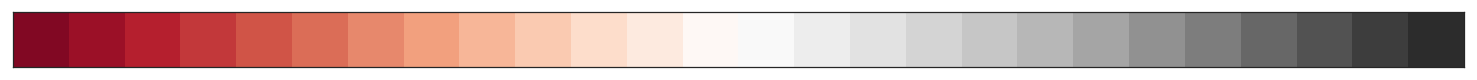

In [5]:
palette = sns.color_palette(palette='RdGy', n_colors=games_p[0].shape[0])
letter_palette = pd.Series(palette, index=games_p[0]['letter']).to_dict()
sns.palplot(palette)

In [6]:
def plot_letters(df_list, names):
    
    fig, ax = plt.subplots(nrows=len(df_list), figsize=(15, 2.5*len(df_list)), facecolor='w')

    for index, df in enumerate(df_list):
        sns.barplot(
            data = df,
            x = df['letter'],
            y = df['proportion'],
            palette = letter_palette,
            ax = ax[index],
            linewidth = 1,
            edgecolor = '.2')
        xticklabels = (f'{e[0]}\n{e[1]:.2f}' for e in df[['letter','proportion']].values)
        ax[index].set(xlabel='', ylabel='', xticklabels=xticklabels, yticklabels='')

    for i, j in enumerate(ax):
        ax[i].set_title(names[i], pad=-15)

    fig.tight_layout()
    sns.despine(left=True)

    plt.show()    

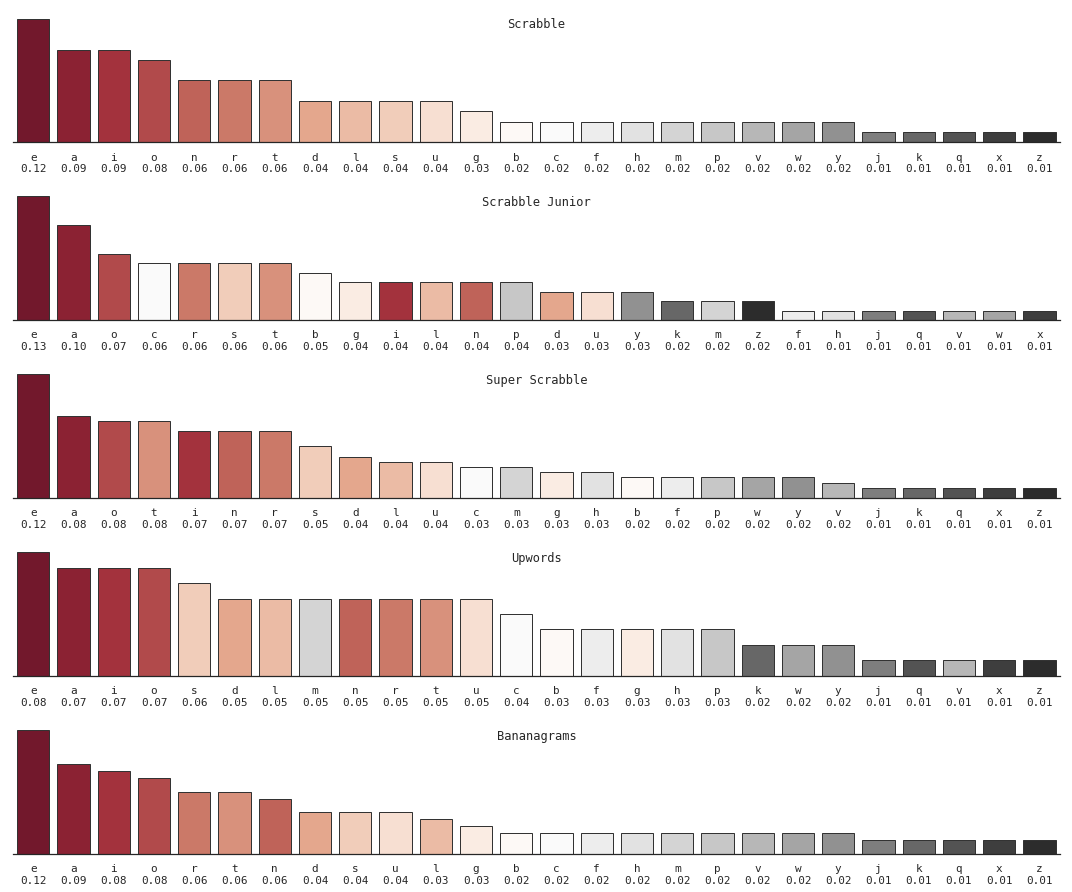

In [7]:
plot_letters(games_p, names)

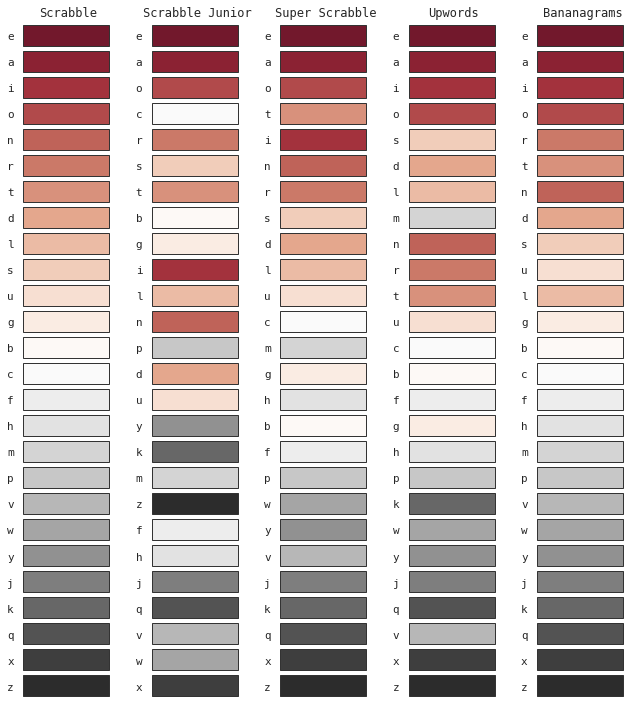

In [8]:
fig, ax = plt.subplots(ncols=len(games_p), figsize=(9, 10), facecolor='w')

for index, df, in enumerate(games_p):
    sns.barplot(data=df,
                x=df['proportion']**0,
                y='letter',
                palette=letter_palette,
                ax=ax[index],
                linewidth=1,
                edgecolor='.2')
    ax[index].set(xlabel='', ylabel='', xticklabels='')
    
for i, j in enumerate(ax):
    ax[i].set_title(names[i])
    
fig.tight_layout()
sns.despine(left=True, bottom=True)
plt.show()

## Boggle Slam (aka Scrabble Slam)

Boggle Slam (sold as Scrabble Slam in some places) is also a game about spelling words, but differs from the other games in two important respects: first, the goal of the game involves spelling words of exactly four letters and, second, the game pieces have one letter on each side, only one of which can be in play. Similar to Upwords, words can be made by placing letters on top of others. Indeed during a typical game most words are made by changing one or two letters of an existing word.

In [9]:
slam_cards = pd.read_csv('data/boggle_slam_cards.csv')
slam_counts = pd.read_csv('data/boggle_slam_counts.csv')

slam_counts_p = add_proportion(slam_counts[:-1])

display(slam_cards.T)
display(slam_counts_p.T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
obverse,a,a,a,b,b,b,c,c,d,e,e,e,e,f,f,f,g,g,h,h,j,k,k,l,l,m,m,m,n,n,n,o,o,p,p,p,p,p,r,r,r,s,s,s,s,t,t,t,t,v,w,z,BLANK,BLANK,BLANK
reverse,a,l,t,f,o,u,b,z,y,j,l,m,t,m,r,r,a,d,a,n,s,c,e,i,o,c,i,v,a,f,s,k,m,d,e,i,r,u,e,h,t,d,e,o,w,f,h,l,y,o,p,k,BLANK,BLANK,BLANK


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
letter,e,a,t,f,m,o,p,r,s,l,b,c,d,h,k,n,i,g,j,u,v,w,y,z,q,x
count,8,7,7,6,6,6,6,6,6,5,4,4,4,4,4,4,3,2,2,2,2,2,2,2,0,0
proportion,0.077,0.067,0.067,0.058,0.058,0.058,0.058,0.058,0.058,0.048,0.038,0.038,0.038,0.038,0.038,0.038,0.029,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.000,0.000


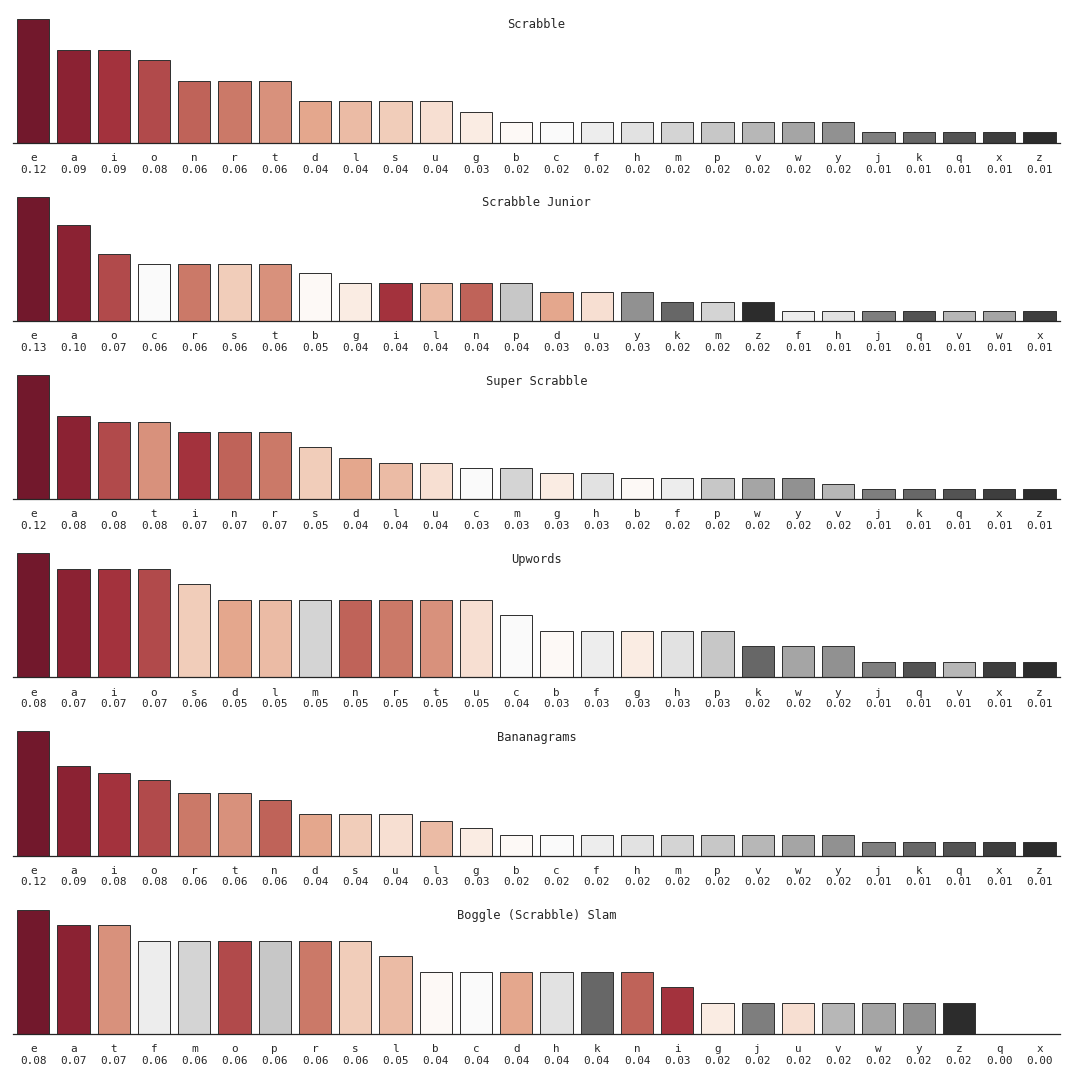

In [10]:
plot_letters(games_p + [slam_counts_p], names + ['Boggle (Scrabble) Slam'])

This is incredibly different! At a glance, this distribution of letters looks like it would be well-suited to making a lot of common four-letter words. We don't have any insight into the development of the game, but a safe assumption is that this distribution of letters was arrived at by analyzing some text corpus of four-letter words, at least in part. We can test this by comparing the relative frequencies of letters in four-letter words. I've picked to documents to make a miniature corpus. The first is a list a common short words compiled by Josh Kaufman ([Github](https://github.com/first20hours/google-10000-english)) and the other is the full text from Lucy Maud Montgomery's *Anne of Green Gables* ([Project Gutenberg](http://www.gutenberg.org/ebooks/45)), chosen for being a literary work with a low reading level.

The next cell transforms these two documents into dataframes with the same format as the others so far in this notebook. The code to do this is a bit of mess given the very different structures of the documents, but I hope that it is still readable. The file `stopwords.text` is a list of very common English words that are typically excluded during text analysis. The original list was sourced from the Natural Language Toolkit ([nltk.org](http://www.nltk.org/)) and modified to exlcuded Roman numerals. Finally the relative frequencies of the letters are plotted so we can compare.

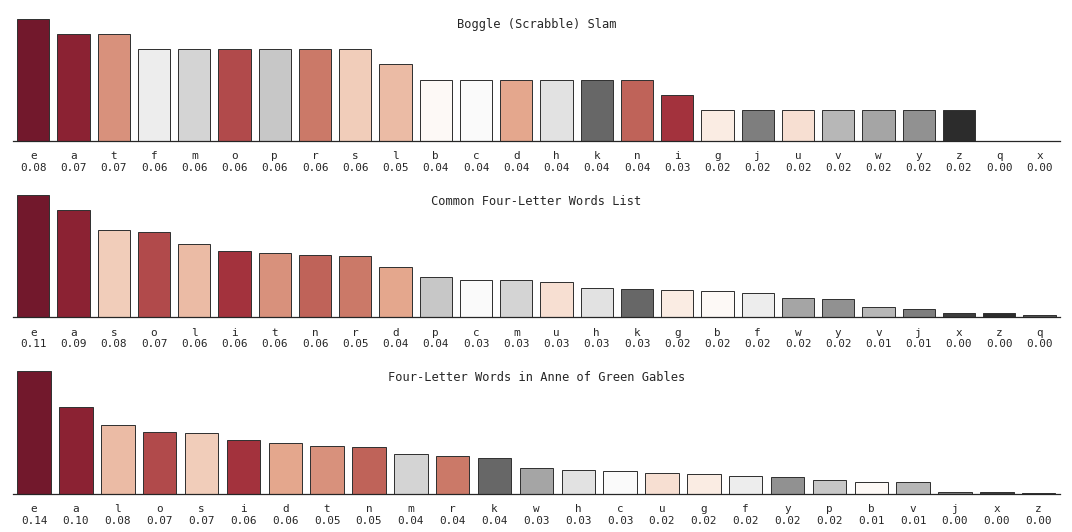

In [11]:
with open('data/stopwords.txt') as stopwords_file:
    stopwords = stopwords_file.read().split() + ['anne']

mini_corpus = ['data/google-10000-english-usa-no-swears-short.txt',
               'data/Lucy Maud Montgomery___Anne Of Green Gables.txt']

four_letter = []

for c in mini_corpus:
    
    counter = Counter()
    
    with open(c, 'r') as file:
        text = file.read().lower().split()
        # Get four-letter words without apostrophes, not found in stopwords, and without punctuation.
    words = [w for w in text
             if len(w)==4
             and w not in stopwords
             and not bool(set(w).intersection(set(punctuation)))]
    counter.update(l for w in words for l in w)
    
    df = pd.DataFrame.from_dict(counter, orient='index')
    df.reset_index(inplace=True)
    df.columns = ['letter', 'count']
    df['proportion'] = df['count'] / df['count'].sum()
    df.sort_values(by=['count', 'letter'], ascending=[False, True], inplace=True)
    df.reset_index(inplace=True, drop=True)
    four_letter.append(df)

dfs_to_plot = [slam_counts_p, four_letter[0], four_letter[1]]
names_to_plot = ['Boggle (Scrabble) Slam',
                 'Common Four-Letter Words List',
                 'Four-Letter Words in Anne of Green Gables']
plot_letters(dfs_to_plot, names_to_plot)

Well, so much for my hypothesis, because those couldn't look much more different! Perhaps they used a literature corpus 